# Logistic Regression Project Exercise 

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

### Exploratory Data Analysis and Visualization
---
- Perform EDA and explain each graph

### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import warnings

In [ ]:
warnings.filterwarnings('ignore')
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "chest_pain_type", "resting_blood_pressure", "serum_cholesterol", "fasting_blood_sugar", 
                "resting_ecg", "max_heart_rate", "exercise_induced_angina", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=column_names, na_values="?")

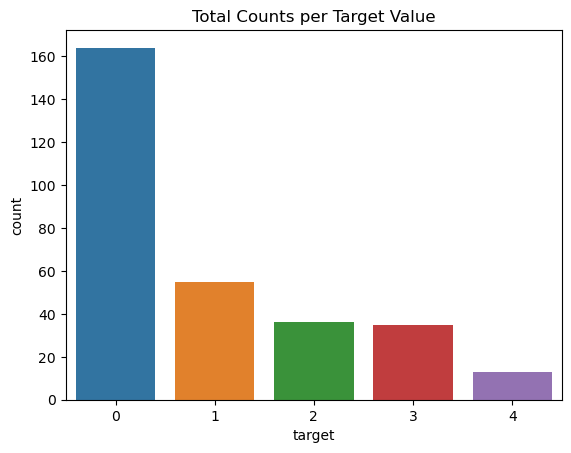

In [9]:
sns.countplot(x='target', data=data)
plt.title('Total Counts per Target Value')
plt.show()

**TASK: Create a pairplot that displays the relationships between the following columns:**

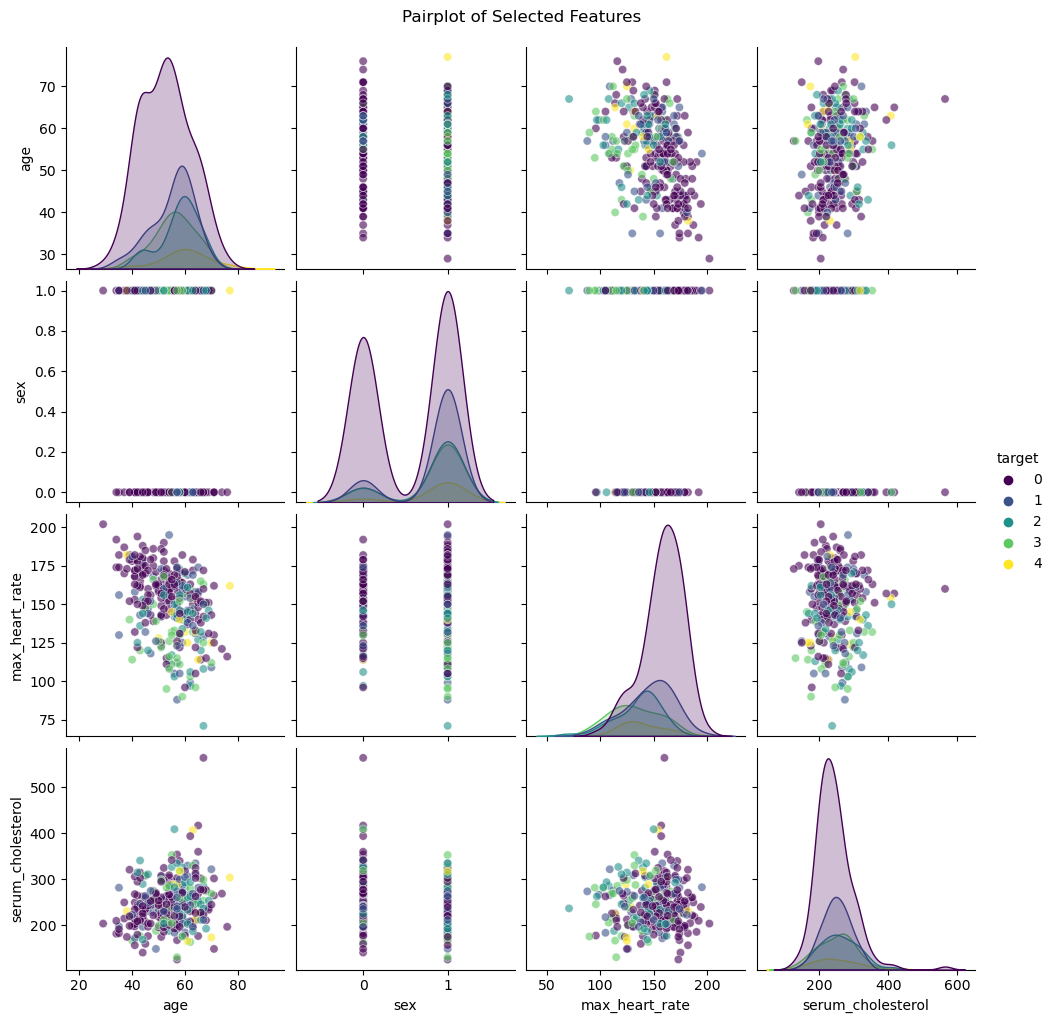

In [10]:
selected_columns = ['age', 'sex', 'max_heart_rate', 'serum_cholesterol', 'target']
sns.pairplot(data[selected_columns], hue='target', plot_kws={'alpha': 0.6}, palette='viridis')
plt.suptitle('Pairplot of Selected Features', y=1.02) 
plt.show()

The plot in the top right corner shows the relationship between age and max heart rate. It appears that there is a weak positive correlation between these two features, which means that as people get older, their max heart rate tends to increase as well.

The diagonal plots are histograms that show the distribution of each individual feature. For example, the plot in the bottom left corner shows the distribution of serum cholesterol. It appears that the distribution is right skewed, meaning there are more instances with lower cholesterol levels than higher cholesterol levels.

**TASK: Create a heatmap that displays the correlation between all the columns.**

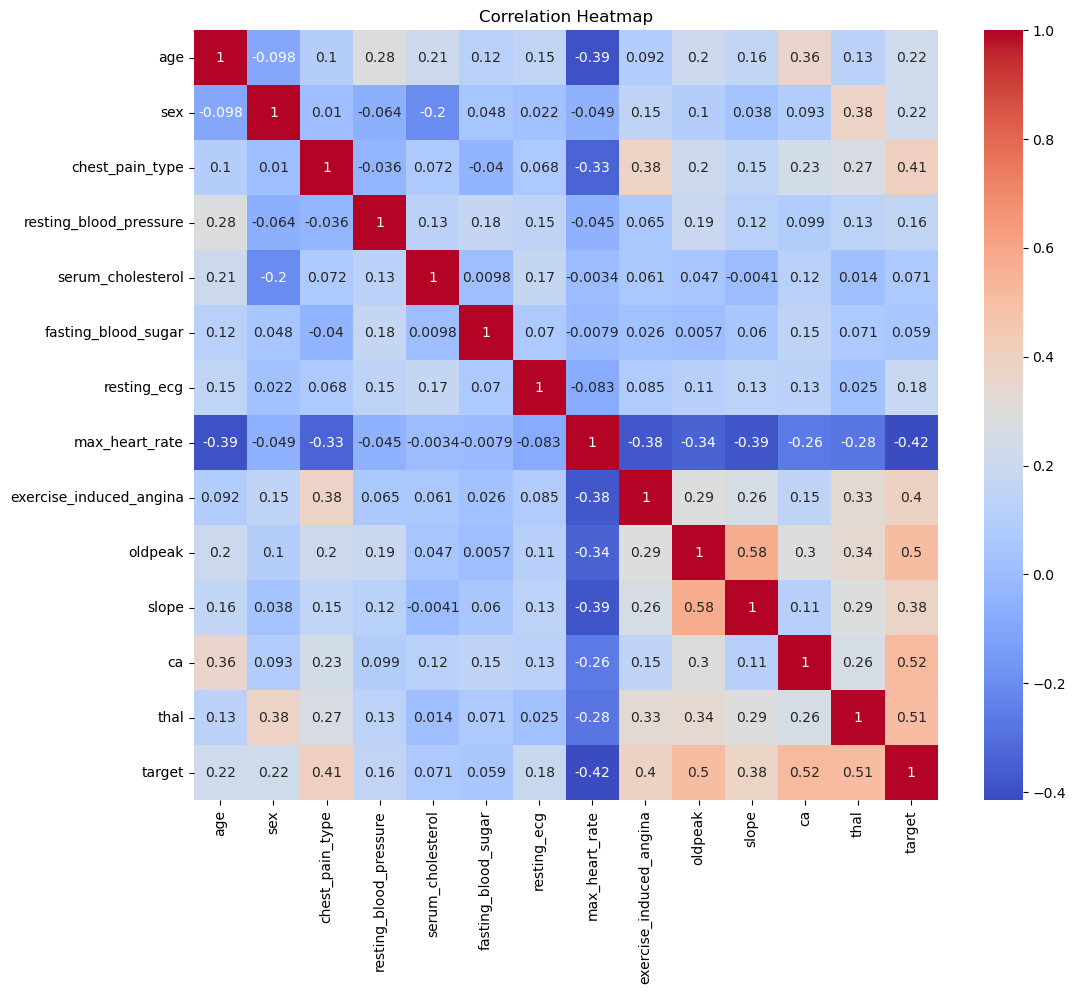

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Modeling Task

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [14]:
data.fillna(data.mean(), inplace=True)
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)
X = data.drop('target', axis=1)
y = data['target']

**TASK: Perform a train test split on the data, with the test size of 5% and a random_state of 0.**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data.**

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [18]:
model = LogisticRegressionCV(cv=5, random_state=0).fit(X_train_scaled, y_train)
print("Optimal C value:", model.C_)

Optimal C value: [0.04641589]


**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

### Coeffecients

**TASK: Report back the model's coefficients.**

In [20]:
coefficients = model.coef_[0]
print("Model coefficients:", coefficients)

Model coefficients: [ 0.07067515  0.26921821  0.38493738  0.19299459  0.17119592 -0.11209948
  0.12255925 -0.24453557  0.33761608  0.30187013  0.21382063  0.57512439
  0.52420097]


**Task: Create a visualization of the coefficients.**

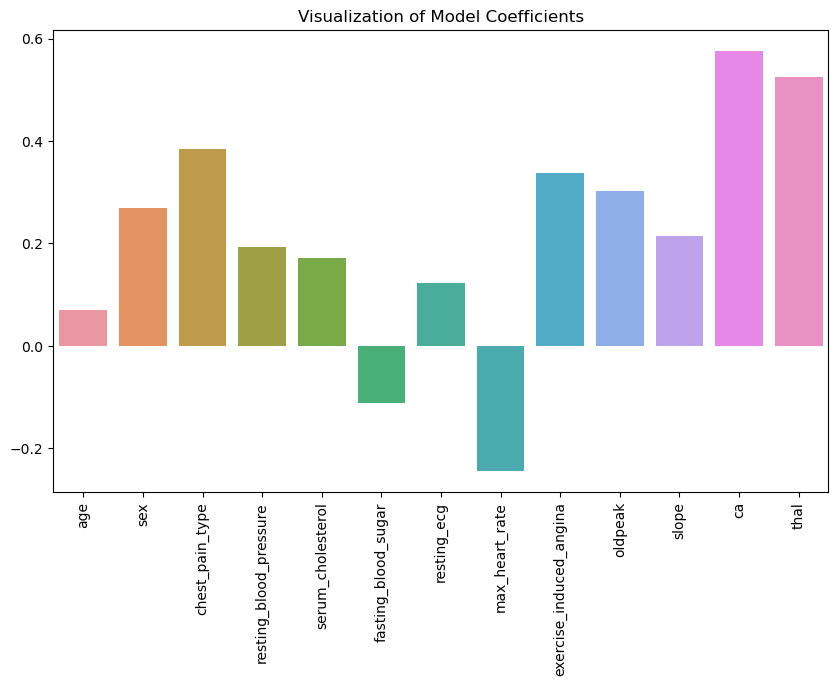

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=column_names[:-1], y=coefficients)
plt.xticks(rotation=90)
plt.title('Visualization of Model Coefficients')
plt.show()

---------

## Model Performance Evaluation

**TASK: Evaluate your model on the remaining 5% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

Confusion Matrix:
 [[5 2]
 [2 7]]


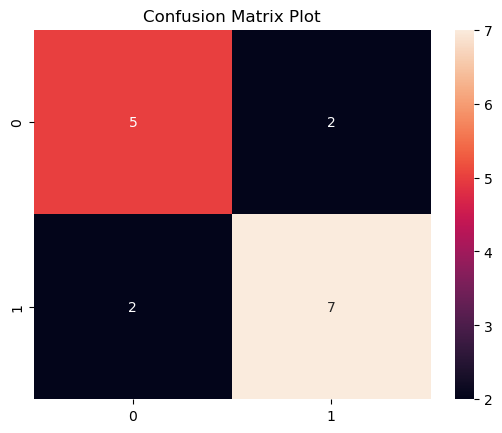

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.78      0.78      0.78         9

    accuracy                           0.75        16
   macro avg       0.75      0.75      0.75        16
weighted avg       0.75      0.75      0.75        16



In [22]:
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix Plot')
plt.show()
print(classification_report(y_test, y_pred))

### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

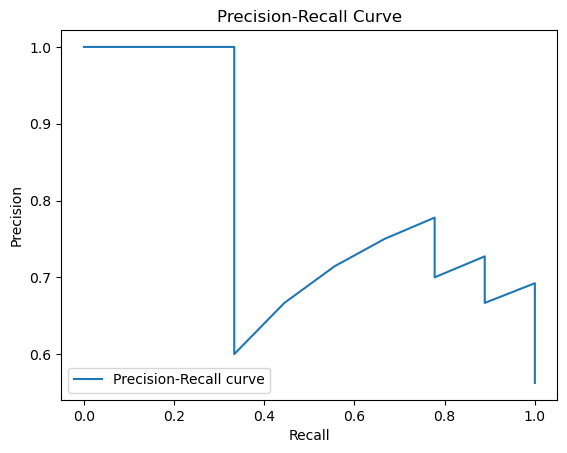

In [23]:
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

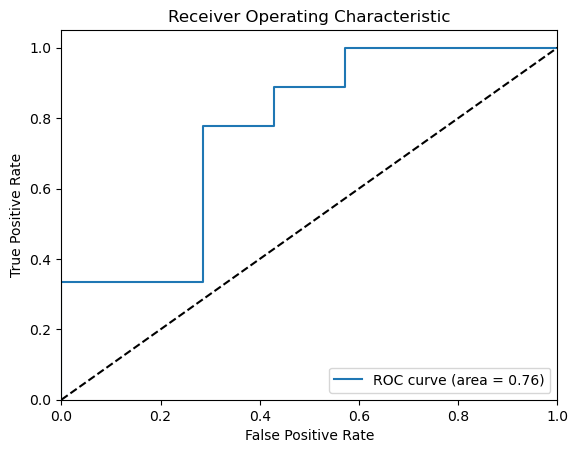

In [24]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()